<a href="https://colab.research.google.com/github/ttruong102/CS114.L21/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Bai_colab_so3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># **Data Discovery**

---

##**Nhóm thực hiện**
1. Lại Nguyễn Vĩnh Phú - 19522020
2. Nguyễn Chí Cường - 19521299
3. Trương Thế Trương - 19522447

##***Dữ liệu***

1. [We code](https://github.com/phutaekwondo/CS114.L21/blob/main/duDoanDiemCuoiKy_homeWork/wecode.csv)
2. [score training](https://github.com/phutaekwondo/CS114.L21/blob/main/duDoanDiemCuoiKy_homeWork/score.csv)

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
!git clone https://github.com/phutaekwondo/CS114.L21.git

Cloning into 'CS114.L21'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 231 (delta 110), reused 35 (delta 9), pack-reused 0
Receiving objects: 100% (231/231), 11.32 MiB | 15.75 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [ ]:
url_wecode = '/content/CS114.L21/duDoanDiemCuoiKy_homeWork/wecode.csv'
url_score = '/content/CS114.L21/duDoanDiemCuoiKy_homeWork/score.csv'

In [ ]:
data_wecode = pd.read_csv(url_wecode)
data_score = pd.read_csv(url_score)

In [ ]:
data_wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 9:34:20,2021-04-28 9:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 9:35:07,2021-04-28 9:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 9:35:15,2021-04-28 9:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 1:34:57,2021-05-11 1:35:28


##Khám phá mục score

In [ ]:
discove_score = {'is_final': data_wecode['is_final'], 'pre_score': data_wecode['pre_score']}
discove_score = pd.DataFrame(discove_score, columns=['is_final', 'pre_score'])

In [ ]:
count_score = Counter(zip(discove_score['is_final'],discove_score['pre_score'])).items()
show_score = pd.DataFrame(count_score, columns=['x', 'y'])
show_score

,x,y
0,"(1, 10000)",95332
1,"(0, 0)",79796
2,"(0, 8000)",7976
3,"(0, 10000)",4508
4,"(1, 0)",2726
...,...,...
656,"(0, 3583)",1
657,"(1, 7250)",1
658,"(0, 5583)",1
659,"(0, 5666)",1


##Tạo dataframe số lượng user_id kết với problem_id

features:

+ số lần nộp bài để pass(theo problem_id, user_id )
+ time last submit - time first submit ( theo pro_id, user_id)
+ max (pre_score) (theo pro_id, user_id)
+ is_final = max(data_wecode['is_final']

features table

user_id | problem_id | số lần nộp | is_final | max(pre_score)|time|
--------|------------|------------|------|----------------|--------|

In [ ]:
first_feature = {'user_id': data_wecode['user_id'], 'problem_id': data_wecode['problem_id']}
first_feature = pd.DataFrame(first_feature, columns = ['user_id', 'problem_id'])

#Đếm submit theo user_id và problem_id
count_submit = Counter(zip(first_feature['user_id'], first_feature['problem_id'])).items()
user_feature = pd.DataFrame(count_submit, columns=['user_id, problem_id', 'amount_submit'])#lúc này có user_id và problem_id chung 1 column

#sắp xếp lại data - tách user_id và problem_id
temp = pd.DataFrame(user_feature['user_id, problem_id'].tolist(), columns = ['user_id','problem_id']) #tạo temp = 2 cột user_id và problem_id khi tác ra
del user_feature['user_id, problem_id'] #Xóa cột
user_feature['user_id'], user_feature['problem_id'] = temp['user_id'], temp['problem_id']#thêm lại 2 cột
cols = user_feature.columns.tolist()#sếp xếp lại
cols = cols[-2:] + cols[:1]
user_feature = user_feature[cols]
#sort theo user_id_problem_id và set index
user_feature = user_feature.sort_values(by=['user_id', 'problem_id']).set_index(pd.Index(range(len(user_feature))))

>Lấy max điểm, time, is_final cho từng user_problem_id

In [ ]:
#Lấy các features pre_score, is_final, time_max
other_feature_user = {'user_problem_id': pd.Series(zip(data_wecode['user_id'], data_wecode['problem_id'])), 'is_final': data_wecode['is_final'],
                      'pre_score': data_wecode['pre_score'], 'diffirence_time': data_wecode['updated_at']}
other_feature_user = pd.DataFrame(other_feature_user, columns=['user_problem_id', 'is_final', 'pre_score', 'diffirence_time'])
other_feature_user = other_feature_user.sort_values(by='user_problem_id').set_index(pd.Index(range(len(other_feature_user))))
other_feature = other_feature_user.groupby(['user_problem_id'], as_index=False).agg('max')

In [ ]:
#Lấy time_min, sau đó tạo thành diffirence_time với time_max với công thức diffirence_time = tim_max - time_min
time_min = {'user_problem_id': pd.Series(zip(data_wecode['user_id'], data_wecode['problem_id'])), 'time_min': data_wecode['updated_at']}
time_min = pd.DataFrame(time_min, columns=['user_problem_id', 'time_min'])
time_min = time_min.sort_values(by='user_problem_id').set_index(pd.Index(range(len(time_min))))
time_min = time_min.groupby(['user_problem_id'], as_index=False).agg('min')
other_feature['diffirence_time'] = pd.to_datetime(other_feature['diffirence_time']) - pd.to_datetime(time_min['time_min'])
other_feature

,user_problem_id,is_final,pre_score,diffirence_time
0,"(1, 81)",1,0,0 days 00:00:00
1,"(1, 370)",1,10000,0 days 00:00:00
2,"(4, 3)",1,10000,0 days 00:00:00
3,"(4, 4)",1,10000,0 days 00:00:00
4,"(4, 5)",1,10000,0 days 00:11:54
...,...,...,...,...
97185,"(1868, 637)",1,10000,1 days 02:20:53
97186,"(1868, 638)",1,10000,1 days 01:39:31
97187,"(1868, 639)",1,10000,1 days 01:22:57
97188,"(1868, 640)",1,10000,1 days 00:43:16


In [ ]:
def covert_time(time):
  day_to_seconds = time.days * 24 * 60 * 60
  return day_to_seconds + time.seconds
user_feature['is_final'], user_feature['pre_score'] = other_feature['is_final'], other_feature['pre_score']
user_feature['diffirence_time'] = other_feature['diffirence_time'].apply(covert_time)
user_feature

,user_id,problem_id,amount_submit,is_final,pre_score,diffirence_time
0,1,81,1,1,0,0
1,1,370,1,1,10000,0
2,4,3,1,1,10000,0
3,4,4,1,1,10000,0
4,4,5,5,1,10000,714
...,...,...,...,...,...,...
97185,1868,637,4,1,10000,94853
97186,1868,638,4,1,10000,92371
97187,1868,639,2,1,10000,91377
97188,1868,640,2,1,10000,88996


In [ ]:
user_feature.to_csv("/content/CS114.L21/duDoanDiemCuoiKy_homeWork/user_feature.csv")

##Continute

In [ ]:
url_feature = '/content/CS114.L21/duDoanDiemCuoiKy_homeWork/user_feature.csv'
user_feature = pd.read_csv('/content/CS114.L21/duDoanDiemCuoiKy_homeWork/user_feature.csv')
del user_feature['Unnamed: 0']
user_feature

,user_id,problem_id,amount_submit,is_final,pre_score,diffirence_time
0,1,81,1,1,0,0
1,1,370,1,1,10000,0
2,4,3,1,1,10000,0
3,4,4,1,1,10000,0
4,4,5,5,1,10000,714
...,...,...,...,...,...,...
97185,1868,637,4,1,10000,94853
97186,1868,638,4,1,10000,92371
97187,1868,639,2,1,10000,91377
97188,1868,640,2,1,10000,88996


##Xử lý user_features

> Biến đổi về theo user_id để có thể ánh xạ với feature_score


In [ ]:
synthetic = user_feature.groupby(['user_id']).agg(list)

In [ ]:
synthetic

,problem_id,amount_submit,is_final,pre_score,diffirence_time
user_id,,,,,
1,"[81, 370]","[1, 1]","[1, 1]","[0, 10000]","[0, 0]"
4,"[3, 4, 5, 6, 7, 8, 9, 81, 101, 104, 106, 107, ...","[1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","[0, 0, 714, 0, 0, 0, 0, 0, 119, 0, 0, 0, 0, 0,..."
5,"[1, 4, 81, 176, 243]","[1, 1, 1, 1, 2]","[1, 1, 1, 1, 1]","[10000, 10000, 0, 10000, 0]","[0, 0, 0, 0, 38]"
6,"[1, 3, 9, 80, 81, 82, 83, 84, 85, 86, 87, 88, ...","[2, 2, 1, 5, 2, 1, 4, 1, 1, 1, 4, 3, 3, 2, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 10000, 0, 10000, 10000, 10000, 10000, 1000...","[105, 0, 0, 6068, 0, 0, 183, 0, 0, 0, 417, 812..."
7,"[265, 390]","[2, 3]","[1, 1]","[8571, 638]","[598, 283]"
...,...,...,...,...,...
1860,"[3, 4, 5, 7, 8, 9, 11, 25, 174, 175, 176, 177,...","[1, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 4, 2, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10000, 0, 10000, 0, 10000, 0, 0, 10000, 0, 10...","[0, 115, 0, 86, 0, 0, 54, 0, 0, 50, 223291, 22..."
1862,"[1, 10, 11, 176, 181, 182]","[4, 2, 3, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[10000, 0, 0, 10000, 10000, 10000]","[2188, 113, 359, 0, 0, 0]"
1864,"[1, 3, 4, 5, 6, 7, 8, 10, 11, 80, 81, 82, 84, ...","[5, 6, 10, 1, 3, 5, 5, 3, 12, 4, 5, 3, 2, 1, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10000, 10000, 10000, 10000, 0, 10000, 10000, ...","[160979, 161000, 160963, 0, 386, 1260, 183, 10..."


>Bảng điểm cho problem_id

In [ ]:
#tried_feature
count_sb_problem = Counter(data_wecode['problem_id']).items()
score_table = pd.DataFrame(count_sb_problem, columns=['problem_id', 'tried'])
score_table = score_table.sort_values('problem_id')
score_table = score_table.set_index('problem_id')
#solved_feature
solved_feature = {'problem_id': data_wecode['problem_id'], 'solved': data_wecode['is_final']}
solved_feature = pd.DataFrame(solved_feature, columns=['problem_id', 'solved'])
solved_feature = solved_feature.groupby(['problem_id']).agg('sum')

In [ ]:
score_table['solved'] = solved_feature['solved']
score_table['Tried/Solved'] = score_table['tried']/solved_feature['solved']
score_table = score_table.replace(max(score_table['Tried/Solved']), 0) #thay những Tried/Solved = number/0 thành 0. Vì không có ai giải được cũng không tính điểm thôi
score_table

,tried,solved,Tried/Solved
problem_id,,,
1,3249,1001,3.245754
2,231,53,4.358491
3,2992,988,3.028340
4,4213,899,4.686318
5,1271,840,1.513095
...,...,...,...
692,5,2,2.500000
695,29,8,3.625000
696,20,3,6.666667


In [ ]:
def newFeature(x):
  return score_table['Tried/Solved'][x]
extract = {'user_id': user_feature['user_id'], 'problem_id': user_feature['problem_id'],
           'amount_submit': user_feature['amount_submit'], 'is_final': user_feature['is_final']}
extract = pd.DataFrame(extract)
extract['score'] = extract['problem_id'].apply(newFeature) * extract['is_final']
extract['score'] = extract['score']/extract['amount_submit']
del extract['amount_submit'], extract['problem_id'], extract['is_final']
extract = extract.groupby('user_id').agg('sum')
extract = extract.reset_index()
extract

,user_id,score
0,1,4.409615
1,4,76.330802
2,5,13.610509
3,6,184.542450
4,7,4.161111
...,...,...
1154,1860,64.666583
1155,1862,8.455327
1156,1864,87.652435
1157,1865,11.998391


Idea: từ DataFrame **synthetic** và **score_table** tạo feature bằng cách tính điểm

Vd: user_id = 1 giải problem 81 và 370 chiếu qua DataFrame score_table lấy Tried/Solved của problem 81 và 370 chia amount_submit của tường thằng the user_id cộng lại.

Hoặc có thể dùng môt số công thức khác.

#**Score Data**

In [ ]:
data_score

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [ ]:
features_score = {'id': data_score['id'], 'CK': data_score['CK']}
features_score = pd.DataFrame(features_score, columns = ['id', 'CK'])

In [ ]:
features_score

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


#**Vẽ (scatter plot)**

In [ ]:
# define scatter plot method
# function has two agurment
# 1 feature, 1 score
# both agurment are DataFrame
# each has an "id" column, a "somthing" column
# example:
#    DataFrame feature:
#    |-id-|-feature-|
#    |----|---------|
#    | 2  | 2.5     |
#    | 3  | 2.0     |
#    | 6  | 1.0     |
#    | 69 | 6.9     |
#    | ...| ...     |
# data's type must be number, like int, float. 

import matplotlib.pyplot as plt

def scatter_plot_1feat_1score( feat, score ):
    _whole_data = pd.merge( feat, score, on="id", how="inner" )
    _np_data = _whole_data.to_numpy()

    _plt_X = _np_data[:,1]
    _plt_Xlabel = _whole_data.columns[1]
    _plt_y = _np_data[:,2]
    _plt_ylabel = _whole_data.columns[2]

    plt.plot( _plt_X, _plt_y, "x" )
    plt.xlabel( _plt_Xlabel )
    plt.ylabel( _plt_ylabel )
    plt.show()


In [ ]:
_feat = extract.rename( columns={"user_id":"id"})
_score = features_score.loc[ features_score["CK"] != "\xa0" ]
_score = _score.astype( {"CK":float} )

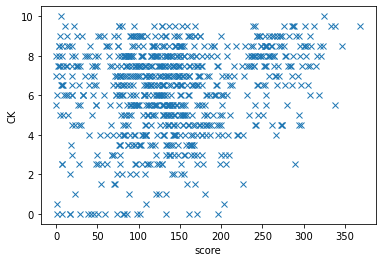

In [ ]:
scatter_plot_1feat_1score( _feat, _score )

Thấy feature không đẹp, thế này chắc chỉ có thêm feature mới giải quyết được vấn đề

#**Lấy các Feature khác**

##Feature "Số problem đã solved" 

In [ ]:
df_solved = data_wecode[ data_wecode["is_final"] == 1 ]
df_solved = df_solved[ df_solved["pre_score"] == 10000 ]

In [ ]:
count_df_score = df_solved.set_index(["assignment_id", "problem_id", "user_id"]).count( level ="user_id" )

In [ ]:
df_count_df_score = count_df_score["id"].to_frame()

In [ ]:
df_count_df_score = df_count_df_score.reset_index()
df_count_df_score = df_count_df_score.rename( columns={"id":"solved", "user_id":"id"})

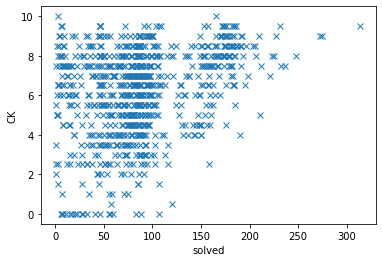

In [ ]:
scatter_plot_1feat_1score( df_count_df_score, _score )

##Feature "tổng pre_score của submit cuối của các problem"

In [ ]:
df_prescore = data_wecode.loc[ data_wecode["is_final"] == 1 ][["user_id","pre_score"]]
df_prescore = df_prescore.groupby(["user_id"]).sum()
df_prescore = df_prescore.reset_index().rename( columns={"user_id":"id"} )

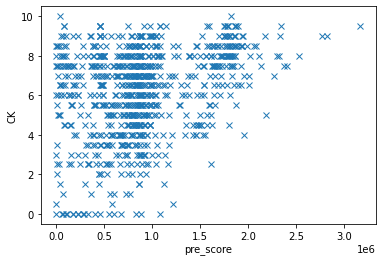

In [ ]:
scatter_plot_1feat_1score( df_prescore, _score )

Nhận xét : 
+ feature này gần như giống với feature "số problem đã giải".
+ chỉ khác feature nhắc ở trên ở vài điểm do feature này tính luôn các problem chưa giải được của sv.

##Feature "số problem/số submit của 1 sv"

In [ ]:
#data số problem 1 sv có submit
df_problem = data_wecode[["id", "user_id", "problem_id", "assignment_id"]].drop_duplicates( subset = ["user_id", "problem_id", "assignment_id"], keep="first" )
df_problem = df_problem.set_index( ["user_id", "problem_id", "assignment_id"]).count(level="user_id")
df_problem = df_problem.reset_index()
df_problem = df_problem.rename( columns = {"id":"problems", "user_id": "id" })

In [ ]:
#data số submit của 1 sv
df_submit = data_wecode[["id", "user_id", "problem_id", "assignment_id"]]
df_submit = df_submit.set_index( ["user_id", "problem_id", "assignment_id"]).count(level="user_id")
df_submit = df_submit.reset_index()
df_submit = df_submit.rename( columns = {"id":"submits", "user_id": "id" })

In [ ]:
df_problem_div_submit = pd.merge( df_problem, df_submit, on="id", how = "inner")
df_problem_div_submit["div"] = df_problem_div_submit["problems"] / df_problem_div_submit["submits"]

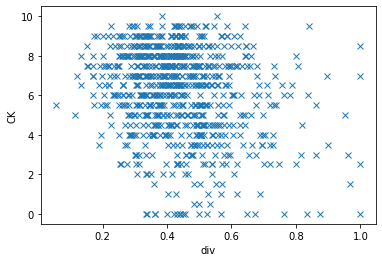

In [ ]:
scatter_plot_1feat_1score( df_problem_div_submit[["id", "div"]] , _score)

##Feature "tổng số submision" 

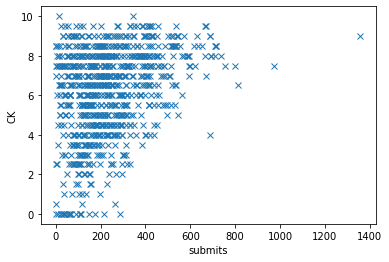

In [ ]:
scatter_plot_1feat_1score( df_submit, _score )

##Thời điểm submit cuối cùng - thời điểm submit đầu tiên của mỗi problem

In [ ]:
time_feature = user_feature[['user_id', 'diffirence_time']]
time_feature = time_feature.groupby('user_id', as_index=False).agg('mean')
time_feature = time_feature.rename(columns={'user_id': 'id'})
time_feature

,id,diffirence_time
0,1,0.000000
1,4,40.902439
2,5,7.600000
3,6,5429.806818
4,7,440.500000
...,...,...
1154,1860,46940.209302
1155,1862,443.333333
1156,1864,10764.777778
1157,1865,16010.941176


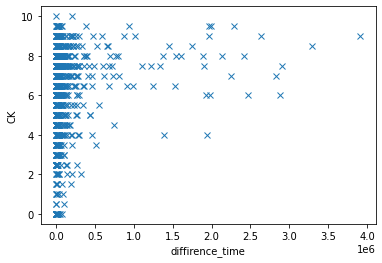

In [ ]:
scatter_plot_1feat_1score(time_feature, _score)

##Trung bình cộng của Tỷ lệ: problem đã submit/số lượng problem của mỗi assignments 

In [ ]:
assignment_problem = pd.DataFrame({'user_id': data_wecode['user_id'],
                      'assignment_id': data_wecode['assignment_id']})
assignment_problem['amount_submit'] = pd.Series([1]*len(assignment_problem))
assignment_problem = assignment_problem.groupby(by=['user_id', 'assignment_id'], as_index=False).agg('sum')
assignment_problem

,user_id,assignment_id,amount_submit
0,1,0,2
1,4,0,54
2,5,64,1
3,5,91,2
4,5,117,2
...,...,...,...
12360,1865,296,15
12361,1868,0,26
12362,1868,271,6
12363,1868,272,9


In [ ]:
count_submit = Counter(data_wecode['assignment_id']).items()
assignment_table = pd.DataFrame(count_submit, columns=['assignment_id', 'amount_submit']).set_index('assignment_id')
assignment_table

,amount_submit
assignment_id,
0,3838
7,6171
12,608
8,664
11,1116
...,...
376,169
375,178
383,3280


In [ ]:
def new_feature(x):
  return assignment_table['amount_submit'][x]
assignment_problem['assignment_id'] = assignment_problem['assignment_id'].apply(new_feature)
assignment_problem['div'] = (assignment_problem['amount_submit']/assignment_problem['assignment_id'])
del assignment_problem['assignment_id'], assignment_problem['amount_submit']
assignment_problem = assignment_problem.groupby(by = ['user_id'], as_index=False).agg('mean')
assignment_problem = assignment_problem.rename(columns={'user_id': 'id'})
assignment_problem

,id,div
0,1,0.000521
1,4,0.014070
2,5,0.001145
3,6,0.011705
4,7,0.001303
...,...,...
1154,1860,0.008437
1155,1862,0.006309
1156,1864,0.209605
1157,1865,0.056195


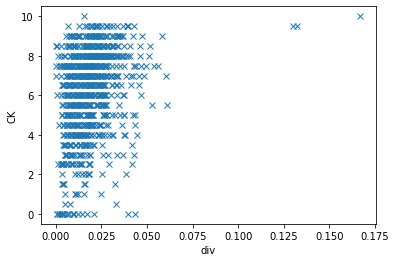

In [ ]:
scatter_plot_1feat_1score(assignment_problem, _score)

Có rút 2 feature là:
- Thời gian submit cuối - thời gian submit đầu của mỗi problem
- Trung bình cộng của tỷ lệ: problem đã submit/số lượng problem của assignments

Hai feature thấy quá xấu nên không thêm vào train.

#**Build model linear regression và train**

data sẽ có các feature sau
+ feature gì đó của cường ( Trương hãy sửa dòng này )
+ số problem đã solved
+ số problem/số submit của 1 sv
+ tổng số submision

In [ ]:
#
wecode_feature = _feat
# feature Solved Problem
wecode_feature = pd.merge( wecode_feature, df_count_df_score, on="id", how="inner" )
# feature Problems/Submit times
wecode_feature = pd.merge( wecode_feature, df_problem_div_submit[["id", "div"]], on="id", how="inner" )
# feature Submision total
wecode_feature = pd.merge( wecode_feature, df_submit, on="id", how="inner" )

wecode_feature = pd.merge( wecode_feature, _score, on="id", how="inner" ) # output

wecode_feature = wecode_feature.dropna()

wecode_feature


,id,score,solved,div,submits,CK
0,24,128.489527,72,0.475610,164,9.5
1,27,6.027100,3,0.384615,13,10.0
2,29,118.021749,72,0.402010,199,8.5
3,34,128.575499,81,0.385321,218,6.5
4,35,241.752533,145,0.511785,297,4.5
...,...,...,...,...,...,...
791,1856,46.895253,23,0.484375,64,7.5
792,1857,61.589848,37,0.727273,55,4.0
793,1859,70.451292,3,0.967742,31,1.5
794,1862,8.455327,4,0.500000,12,7.5


In [ ]:
# split data

_train_percent = 80
_number_of_rows = len( wecode_feature )

_number_train = _number_of_rows//100 * _train_percent

feature_train = wecode_feature.iloc[ 0:_number_train , :]
feature_test  = wecode_feature.iloc[ _number_train:, :]

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array( feature_train[ ['score', 'solved', 'div','submits'] ] )
y_train = np.array( feature_train['CK'] )

model = LinearRegression().fit( X_train, y_train )

In [ ]:
X_test = np.array( feature_test[ ['score', 'solved', 'div','submits'] ] )
y_test = np.array( feature_test['CK'] )

predict = model.predict( X_test )

predict = predict*2
predict = np.round( predict )
predict = predict/2


In [ ]:
from sklearn.metrics import mean_squared_error

print( "MSE :", mean_squared_error( y_test, predict) )

MSE : 4.638297872340425


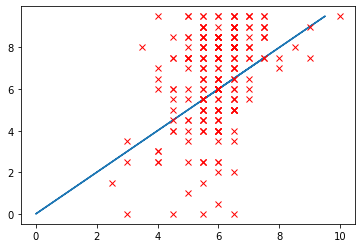

In [ ]:
plt.plot( y_test, y_test )
plt.plot( predict, y_test, "x", color="red")

plt.show()

# **Nhận Xét**

Thấy rằng data không được đẹp nên rút feature cũng không được tốt